In [11]:
import numpy as np
import matplotlib.pylab as plt

# Activation function to determine the output based on input value
def activation_fn(x):
    if x >= 0:
        y = 1 # Positive Sample Set
    else:
        y = -1 # Negative Sample Set
    return y

# Function to calculate the number of misclassifications in the dataset using current weight vector
def misclassified(dataset, w_vector):
    misclassifications = 0
    #print ("===Testing===")
    for sample in dataset: # The first two in samples are the x,y coordinates. The last one in sample is the label.
        y = (w_vector[0]+(sample[0]*w_vector[1])+(sample[1]*w_vector[2]))
        y = activation_fn(y)
        if y != sample[2]:
            misclassifications += 1
    return misclassifications

# Function to plot the classification result with the current weight vector
def plotting_classification_result10(dataset, w_vector, title):
    # Initilize the scale for the plot
    scale=10 # Scale for the plot

    # Collect the coordinates for the postive and negative samples (for the easy of ploting)
    Sp_x = [] # List to store x-coordinates of positive samples
    Sp_y = [] # List to store y-coordinates of positive samples
    Sn_x = [] # List to store x-coordinates of negative samples
    Sn_y = [] # List to store y-coordinates of negative samples

    # Iterate through positive samples and append x, y coordinates to respective lists
    for i in dataset:
        if i[2] == 1:
            Sp_x.append(i[0])
            Sp_y.append(i[1])
        else :
            Sn_x.append(i[0])
            Sn_y.append(i[1])

    # for i in Sp:
    #     Sp_x.append(i[0])
    #     Sp_y.append(i[1])

    # Iterate through negative samples and append x, y coordinates to respective lists
    # for i in Sn:
    #     Sn_x.append(i[0])
    #     Sn_y.append(i[1])
    print(w_vector)
    w0=w_vector[0]
    w1=w_vector[1]
    w2=w_vector[2]
    if w1 != 0:
      x1 = -(w0-w2*scale/2)/w1
      x2 = -(w0+w2*scale/2)/w1
      X = np.array([x1, x2])
      Y = np.array([-scale/2, scale/2])
    elif w2 != 0:
      y1 = -(w0-w1*scale/2)/w2
      y2 = -(w0+w1*scale/2)/w2
      X = np.array([-scale/2, scale/2])
      Y = np.array([y1, y2])

    fig, ax = plt.subplots(figsize=(10,10))
    blue = plt.scatter(Sn_x, Sn_y, c ='b', label='Sn : {} elements'.format(len(Sn_x)))
    red = plt.scatter(Sp_x, Sp_y, c='r', marker = "^", label='Sp : {} elements'.format(len(Sp_x)))
    line = ax.plot(X, Y, c = 'green', label='Perceptron Decision Boundary')
    plt.title(title)
    plt.legend(loc="upper right")
    plt.ylim([-scale/2,scale/2])
    plt.xlim([-scale/2,scale/2])
    plt.show()

# Function to plot the graph on the number of misclassifications vs. the epochs
def plotting_misclassification_over_epochs(w_history, missed):
    n_epochs = range(len(w_history)) # Create a range of epochs for x-axis of plot
    fig, ax = plt.subplots(figsize=(10,10)) # Create a plot figure
    ax.plot(n_epochs, missed+[0], c = 'green') # Plot number of misclassifications vs. epochs
    plt.ylabel('Number of Misclassifications') # Set y-axis label
    plt.xlabel('Number of Epochs') # Set x-axis label
    plt.ylim(bottom=0) # Set lower limit of y-axis to 0
    plt.xlim(left=0) # Set lower limit of x-axis to 0
    plt.show() # Display the plot

In [12]:
#@title This code implements the training of the perceptron learning algorithm (PLA).
def perceptron_training(dataset, w_vec):
    def get_sign(num):
        return 1 if num >= 0 else -1

    def misclassified(d, w):
        misclassifications = 0
        #print ("===Testing===")
        for sample in d: # The first two in samples are the x,y coordinates. The last one in sample is the label.
            y = (w[0]+(sample[0]*w[1])+(sample[1]*w[2]))
            y = activation_fn(y)
            if y != sample[2]:
                misclassifications += 1
        return misclassifications

    epoch = 0
    w_vectors = [w_vec] # List to store weight vectors at each epoch
    # print("w_vects : ", w_vectors)
    missed = [] # List to store number of misclassifications at each epoch
    plotting_classification_result10(dataset, w_vectors[0], 'Initial W') # Plot the classificaiton result with initial weight vector
    # To-Do
    # Need a while loop to continue training until no misclassifications
    miss_class_cnt=-1
    # end_loop_flag = False
    w=w_vec
    while miss_class_cnt != 0 : #or end_loop_flag:

        # Using a for looop to iterate through each sample in the dataset
        for x1,x2,y in dataset:
            # Compute perceptron output
            cal_y = get_sign(w[0] + (w[1] * x1) + (w[2] * x2))
            # If misclassified, update weights
            if cal_y != y:
                w = [ w[0] + y ,  w[1] + ( y * x1 )  , w[2] + ( y * x2 ) ] # w[0] + y as x0 is always 1
                print ('Updated weights: ', w)

        # Calculate misclassification count after weight updates
        miss_class_cnt = misclassified(dataset, w)
        print ('Number of Misclassifications: ', miss_class_cnt)

        # Append current misclassification count to missed
        missed.append(miss_class_cnt)

        print("missed arry : ", missed)

        # plotting_classification_result10(Sp, Sn, w_vector, 'Epoch # '+str(epoch))

        # Append current weight vector to w_vectors list
        w_vectors.append(w)

        # Increment epoch counter
        epoch+=1

    print ('Final weights: ', w_vectors[-1])
    print ('Final res \n W_vects: ', w_vectors, "miss:" , missed)
    return w_vectors, missed


Number of Misclassifications:  1
Initial weights:  [-1, 0.3, 0]
data: [[1, 2, -1], [2, 1, -1], [3, 3, 1], [4, 4, 1]]
[-1, 0.3, 0]


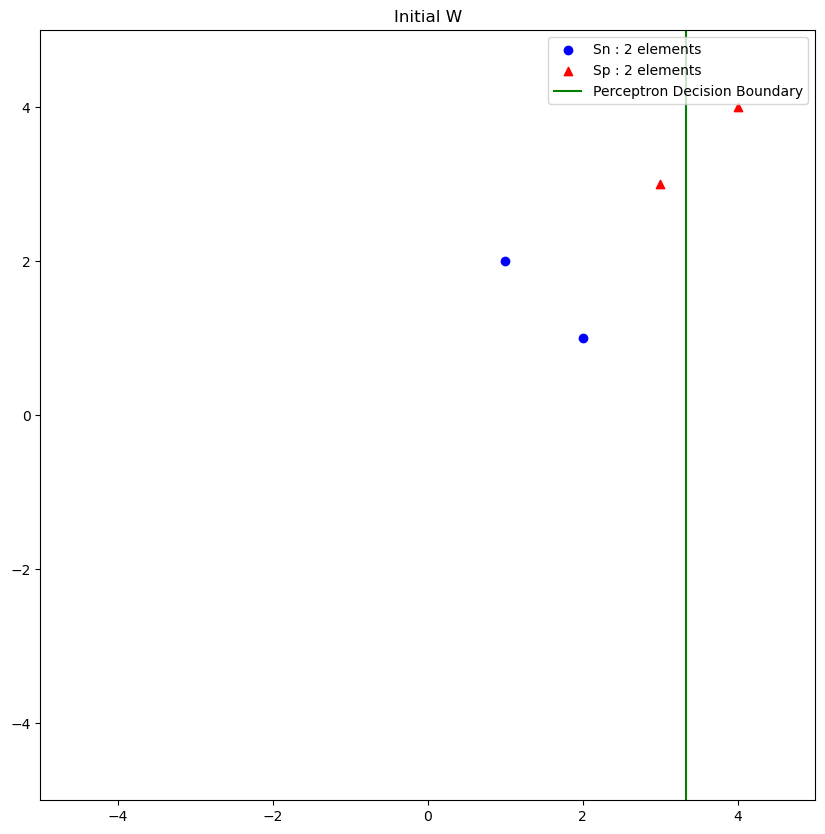

Updated weights:  [0, 3.3, 3]
Number of Misclassifications:  2
missed arry :  [2]
Updated weights:  [-1, 2.3, 1]
Updated weights:  [-2, 0.2999999999999998, 0]
Updated weights:  [-1, 3.3, 3]
Number of Misclassifications:  2
missed arry :  [2, 2]
Updated weights:  [-2, 2.3, 1]
Updated weights:  [-3, 0.2999999999999998, 0]
Updated weights:  [-2, 3.3, 3]
Number of Misclassifications:  2
missed arry :  [2, 2, 2]
Updated weights:  [-3, 2.3, 1]
Updated weights:  [-4, 0.2999999999999998, 0]
Updated weights:  [-3, 3.3, 3]
Number of Misclassifications:  2
missed arry :  [2, 2, 2, 2]
Updated weights:  [-4, 2.3, 1]
Updated weights:  [-5, 0.2999999999999998, 0]
Updated weights:  [-4, 3.3, 3]
Number of Misclassifications:  2
missed arry :  [2, 2, 2, 2, 2]
Updated weights:  [-5, 2.3, 1]
Updated weights:  [-6, 0.2999999999999998, 0]
Updated weights:  [-5, 3.3, 3]
Number of Misclassifications:  2
missed arry :  [2, 2, 2, 2, 2, 2]
Updated weights:  [-6, 2.3, 1]
Number of Misclassifications:  0
missed ar

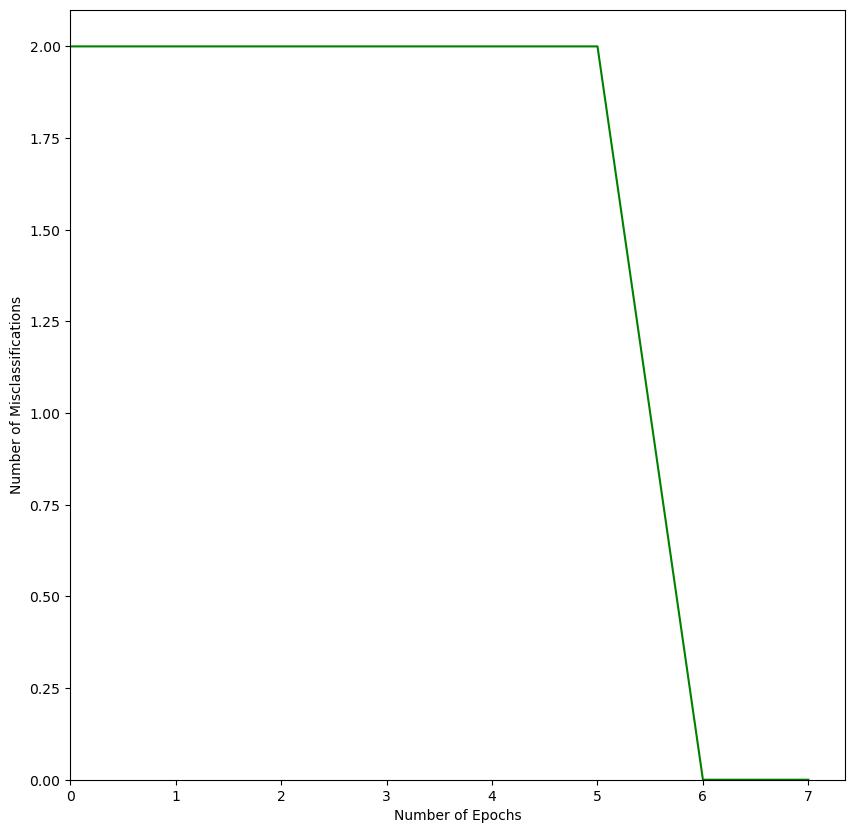

[-6, 2.3, 1]


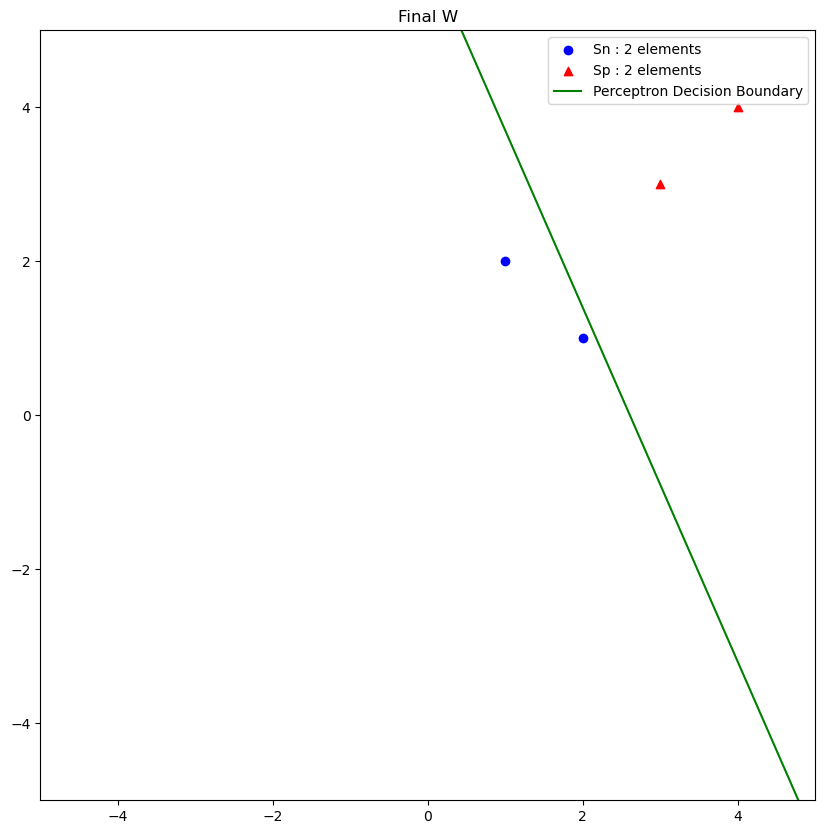

In [13]:
# Initilize the dataset
Sn = [] # List to store negative samples
Sp = [] # List to store positive samples
num_n = 0 # Counter for negative samples
num_p = 0 # Counter for positive samples

scale=10 # Scale for the plot

# Append positive samples to Sp list with x, y coordinates and label
Sp.append([3] + [3] + [1])
num_p +=1
Sp.append([4] + [4] + [1])
num_p +=1

# Append negative samples to Sn list with x, y coordinates and label
Sn.append([1] + [2] + [-1])
num_n +=1
Sn.append([2] + [1] + [-1])
num_n +=1

# Combine positive and negative samples to create the dataset
dataset = Sn + Sp

# Collect the coordinates for the postive and negative samples (for the easy of ploting)
Sp_x = [] # List to store x-coordinates of positive samples
Sp_y = [] # List to store y-coordinates of positive samples
Sn_x = [] # List to store x-coordinates of negative samples
Sn_y = [] # List to store y-coordinates of negative samples

# Iterate through positive samples and append x, y coordinates to respective lists
for i in Sp:
    Sp_x.append(i[0])
    Sp_y.append(i[1])

# Iterate through negative samples and append x, y coordinates to respective lists
for i in Sn:
    Sn_x.append(i[0])
    Sn_y.append(i[1])

#plotting_classification_result10(Sp, Sn, original_w_vector, 'Ground Truth')

# Initilize the weight
w0_ = -1
w1_ = 0.3
w2_ = 0

#plotting_classification_result10(Sp, Sn, w_vector, 'Initial W')

w_vector = [] # List to store weights
w_vector = [w0_, w1_, w2_] # Initialize the weight vector with the given values
a = misclassified(dataset, w_vector) # Get the number of misclassifications
print ('Number of Misclassifications: ', a)

print ('Initial weights: ' , w_vector)
w_history=[] # List to store weight history during training
print("data:", dataset)
w_history, missed = perceptron_training(dataset,w_vector) # Call perceptron_training function to get weight history and number of misclassifications
print("w_hist : " , w_history, "miss:" , missed)
plotting_misclassification_over_epochs(w_history, missed)
plotting_classification_result10(dataset, w_history[-1], 'Final W')
